In [22]:
import json

import joblib
import numpy as np

In [17]:

y_pred_per_model_eff_10 = test['predictions_per_model_dict']
y_true = eff_dat['y_test']

In [21]:
y_pred_model_1 = list(y_pred_per_model_eff_10.values())[0]

wrong_model_1 = np.where(np.not_equal(y_true, y_pred_model_1))[0]

In [23]:

with open(eff_json) as fp:
    eff_json_dict = json.load(fp)

In [14]:
import os

import json
import joblib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def item_heatmap(json_fname, data_fname, test_results_fname,
                 item_type, pred_type):
    """create heatmap of where items were plotted
    to visualize whether location of items affected accuracy

    Parameters
    ----------
    json_fname : str
        path to .json file output by searchstims with target
        and distractor indices from each stimulus file
    data_fname : str
        path to file output by searchnets.data that
        contains list of filenames for training, validation, and
        test sets. Used to link predictions to data in json_fname.
    test_results_fname : str
        path to file output by searchnets.test that
        contains predictions for each trained neural network.
    item_type : str
        one of {'target', 'distractor'}
    pred_type : str
        one of {'correct', 'incorrect'}

    Returns
    -------
    None
    """
    if item_type not in ['target', 'distractor']:
        raise ValueError("pred_type must be either 'target' or 'distractor'")

    if pred_type not in ['correct', 'incorrect']:
        raise ValueError("pred_type must be either 'correct' or 'incorrect'")

    with open(json_fname) as fp:
        stim_info_json = json.load(fp)

    # get indices out of .json file
    if item_type == 'target':
        inds_key = 'target_indices'
    elif item_type == 'distractor':
        inds_key = 'distractor_indices'
    item_indices_by_fname = {
        os.path.basename(stim_info['filename']): stim_info[inds_key]
        for set_size, present_absent_dict in stim_info_json.items()
        for is_target_present, stim_info_list in present_absent_dict.items()
        for stim_info in stim_info_list
    }

    data = joblib.load(data_fname)
    test_set_files = data['test_set_files']
    y_true = data['y_test']
    set_size_vec_test = data['set_size_vec_test']

    # get indices using file names from
    # 'test_set_files' in .npz file with training data,
    # so indices are in same order as y_test from the same file
    y_true_item_indices = []
    for test_set_file in test_set_files:
        y_true_item_indices.append(
            item_indices_by_fname[os.path.basename(test_set_file)]
        )

    # now convert to a numpy array so we can index into it;
    # note this is an "array of lists", because one image may have multiple
    # sets of indices for distractors, for example, but I still want to be able to
    # index by image without doing a bunch of advanced indexing
    y_true_item_indices = np.asarray(y_true_item_indices).squeeze()

    results = joblib.load(test_results_fname)
    predictions_per_model_dict = results['predictions_per_model_dict']

    y_pred = list(predictions_per_model_dict.values())

    to_plot = []
    for y_pred_for_model in y_pred:
        if pred_type == 'correct':
            pred_indices = np.where(y_pred_for_model == y_true)[0]
        elif pred_type == 'incorrect':
            pred_indices = np.where(y_pred_for_model != y_true)[0]
        to_plot.append(pred_indices)

    xx = []
    yy = []
    
    for pred_indices in to_plot:
        these_rows = y_true_item_indices[pred_indices]
        # have to flatten lists of pairs of indices into one long list of pairs of indices
        these_inds = []  # <-- will be long list
        for row in these_rows:
            for inds_pair in row:
                these_inds.append(inds_pair)
        these_inds = np.asarray(these_inds)
        xx.append(these_inds[:, 0])
        yy.append(these_inds[:, 1])

    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(10, 10)
    ax = ax.ravel()
    for ind, (x_vals, y_vals) in enumerate(zip(xx, yy)):
        ax[ind].scatter(x_vals, y_vals)

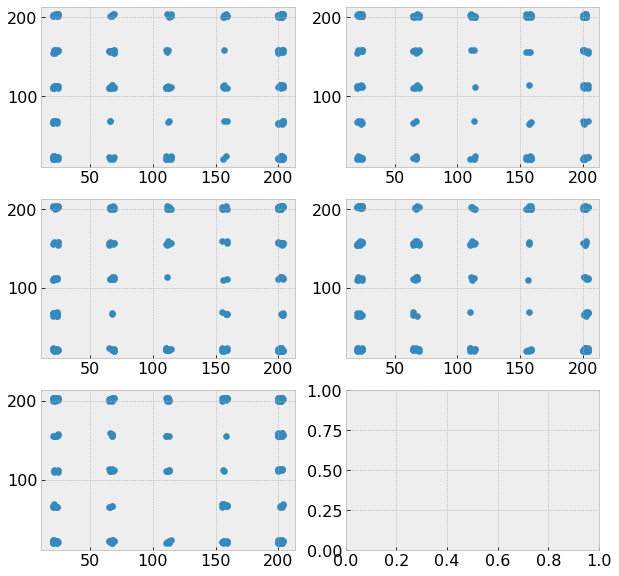

In [15]:
test_eff_10 = '../../results/config_efficient_10_epochs_models/test_alexnet_output.gz'
eff_dat = '/home/bart/Documents/repos/L2M/visual-search-nets/data/data_prepd_for_nets/config_efficient_data.gz'
eff_json = '/home/bart/Documents/repos/L2M/visual-search-nets/data/visual_search_stimuli/searchstims_efficient/efficient.json'

item_heatmap(json_fname=eff_json, data_fname=eff_dat, test_results_fname=test_eff_10, item_type='target', pred_type='incorrect')

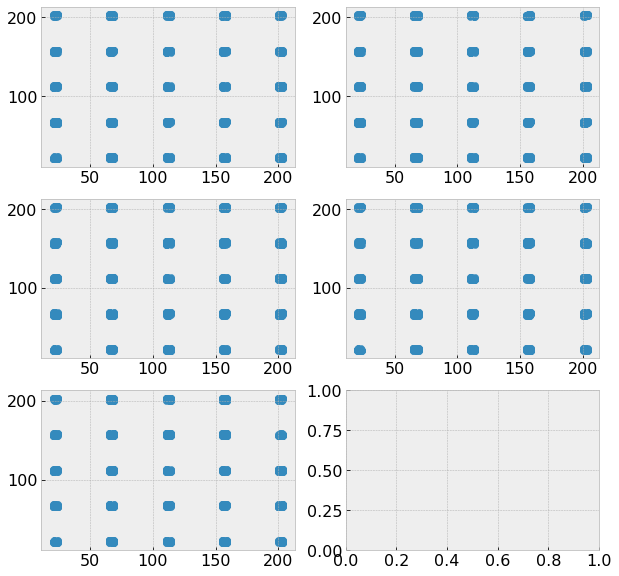

In [16]:
test_eff_10 = '../../results/config_efficient_10_epochs_models/test_alexnet_output.gz'
eff_dat = '/home/bart/Documents/repos/L2M/visual-search-nets/data/data_prepd_for_nets/config_efficient_data.gz'
eff_json = '/home/bart/Documents/repos/L2M/visual-search-nets/data/visual_search_stimuli/searchstims_efficient/efficient.json'

item_heatmap(json_fname=eff_json, data_fname=eff_dat, test_results_fname=test_eff_10, item_type='target', pred_type='correct')

In [13]:
np.ceil(5 / 2)

3.0